In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import dates

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras import backend
from keras.optimizers import Adam
from keras.models import load_model
from keras.utils.vis_utils import plot_model

2022-11-08 16:24:14.395797: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Load Data.

In [2]:
df = pd.read_csv('AMZN.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-11-08,176.162003,178.949997,174.393005,174.449005,174.449005,61480000
1,2021-11-09,175.762497,179.688507,175.071503,178.811493,178.811493,85898000
2,2021-11-10,178.193497,180.272507,173.154495,174.102493,174.102493,80548000
3,2021-11-11,175.649994,177.162003,173.373505,173.625000,173.625000,45288000
4,2021-11-12,174.250000,177.036499,172.352493,176.257507,176.257507,53788000


#### Check for null values.

In [4]:
print('Dataframe Shape: ', df.shape)
print('Null Values Present: ', df.isnull().values.any())

Dataframe Shape:  (253, 7)
Null Values Present:  False


#### Plot the Adj Close Value

<AxesSubplot:>

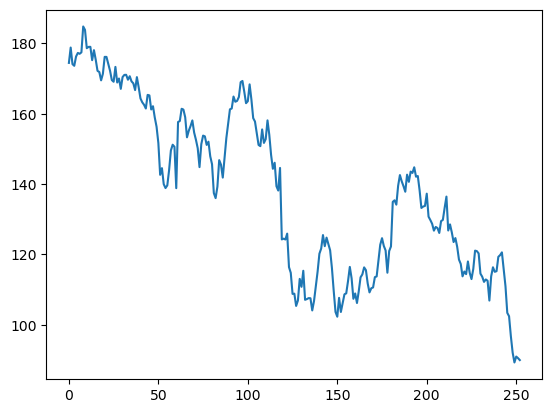

In [5]:
df['Adj Close'].plot()

#### Set Variables

In [6]:
# dependent variable
output_var = pd.DataFrame(df['Adj Close'])

# indepenent variables
features = ['Open', 'High', 'Low', 'Volume']

#### Scale Variables

In [7]:
scaler = MinMaxScaler()

In [8]:
feature_transform = scaler.fit_transform(df[features])

In [9]:
feature_transform = pd.DataFrame(columns = features, data = feature_transform, index = df.index)

In [10]:
feature_transform.head()

,Open,High,Low,Volume
0,0.900126,0.904995,0.901897,0.108591
1,0.895914,0.912657,0.908983,0.211660
2,0.921545,0.918715,0.888961,0.189078
3,0.894728,0.886445,0.891249,0.040243
4,0.879967,0.885143,0.880585,0.076122


In [11]:
feature_transform.describe()

,Open,High,Low,Volume
count,253.000000,253.000000,253.000000,253.000000
mean,0.503220,0.508472,0.501377,0.159981
std,0.255664,0.250327,0.253084,0.141186
min,0.000000,0.000000,0.000000,0.000000
25%,0.262640,0.275154,0.267896,0.074854
50%,0.517136,0.521120,0.509557,0.119591
75%,0.716668,0.725634,0.722850,0.197976
max,1.000000,1.000000,1.000000,1.000000


#### Create Train and Test Sets.

In [12]:
timesplit = TimeSeriesSplit(n_splits=10)

In [13]:
for train_index, test_index in timesplit.split(feature_transform):
    
    X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
    y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index) + len(test_index))].values.ravel()

#### Process the data for LSTM

In [14]:
trainX = np.array(X_train)
testX = np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

#### Construct the Model.

In [15]:
model = Sequential()

2022-11-08 16:24:16.165820: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-08 16:24:16.166120: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [16]:
model.add(LSTM(32, input_shape = (1, trainX.shape[1]), activation = 'relu', return_sequences = False))

In [17]:
model.add(Dense(1))

In [18]:
model.compile(loss='mean_squared_error', optimizer = 'Adam')

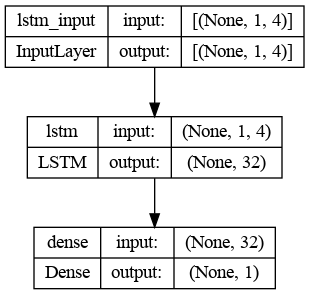

In [19]:
plot_model(model, show_shapes=True, show_layer_names=True)

#### Train the Model.

In [26]:
model.fit(X_train, y_train, epochs=200, batch_size=16, verbose = 2, shuffle=False)

Epoch 1/200
15/15 - 0s - loss: 70.1539 - 65ms/epoch - 4ms/step
Epoch 2/200
15/15 - 0s - loss: 69.7500 - 75ms/epoch - 5ms/step
Epoch 3/200
15/15 - 0s - loss: 69.3479 - 79ms/epoch - 5ms/step
Epoch 4/200
15/15 - 0s - loss: 68.9474 - 71ms/epoch - 5ms/step
Epoch 5/200
15/15 - 0s - loss: 68.5487 - 80ms/epoch - 5ms/step
Epoch 6/200
15/15 - 0s - loss: 68.1516 - 66ms/epoch - 4ms/step
Epoch 7/200
15/15 - 0s - loss: 67.7562 - 61ms/epoch - 4ms/step
Epoch 8/200
15/15 - 0s - loss: 67.3624 - 64ms/epoch - 4ms/step
Epoch 9/200
15/15 - 0s - loss: 66.9704 - 106ms/epoch - 7ms/step
Epoch 10/200
15/15 - 0s - loss: 66.5800 - 76ms/epoch - 5ms/step
Epoch 11/200
15/15 - 0s - loss: 66.1914 - 64ms/epoch - 4ms/step
Epoch 12/200
15/15 - 0s - loss: 65.8044 - 70ms/epoch - 5ms/step
Epoch 13/200
15/15 - 0s - loss: 65.4191 - 86ms/epoch - 6ms/step
Epoch 14/200
15/15 - 0s - loss: 65.0355 - 78ms/epoch - 5ms/step
Epoch 15/200
15/15 - 0s - loss: 64.6535 - 68ms/epoch - 5ms/step
Epoch 16/200
15/15 - 0s - loss: 64.2733 - 86ms/e

15/15 - 0s - loss: 31.5806 - 90ms/epoch - 6ms/step
Epoch 129/200
15/15 - 0s - loss: 31.3690 - 90ms/epoch - 6ms/step
Epoch 130/200
15/15 - 0s - loss: 31.1586 - 90ms/epoch - 6ms/step
Epoch 131/200
15/15 - 0s - loss: 30.9495 - 77ms/epoch - 5ms/step
Epoch 132/200
15/15 - 0s - loss: 30.7416 - 72ms/epoch - 5ms/step
Epoch 133/200
15/15 - 0s - loss: 30.5350 - 100ms/epoch - 7ms/step
Epoch 134/200
15/15 - 0s - loss: 30.3296 - 117ms/epoch - 8ms/step
Epoch 135/200
15/15 - 0s - loss: 30.1254 - 99ms/epoch - 7ms/step
Epoch 136/200
15/15 - 0s - loss: 29.9225 - 70ms/epoch - 5ms/step
Epoch 137/200
15/15 - 0s - loss: 29.7207 - 70ms/epoch - 5ms/step
Epoch 138/200
15/15 - 0s - loss: 29.5202 - 121ms/epoch - 8ms/step
Epoch 139/200
15/15 - 0s - loss: 29.3209 - 170ms/epoch - 11ms/step
Epoch 140/200
15/15 - 0s - loss: 29.1228 - 75ms/epoch - 5ms/step
Epoch 141/200
15/15 - 0s - loss: 28.9259 - 75ms/epoch - 5ms/step
Epoch 142/200
15/15 - 0s - loss: 28.7302 - 80ms/epoch - 5ms/step
Epoch 143/200
15/15 - 0s - loss: 2

#### Use the model to make a prediction.

In [27]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 20ms/step


#### Compare Predicted versus True Adjusted Close Value

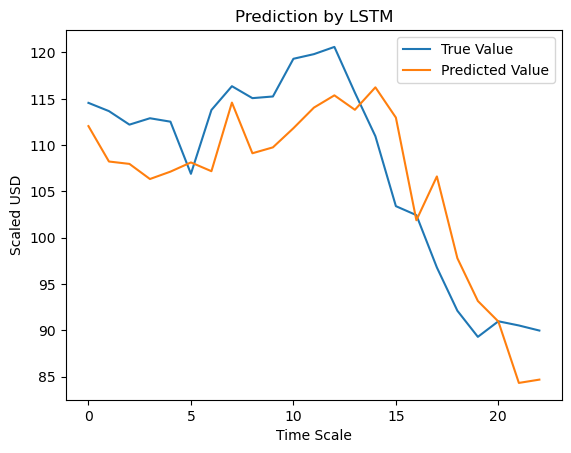

In [28]:
plt.plot(y_test, label = 'True Value')
plt.plot(y_pred, label = 'Predicted Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()